<a href="https://colab.research.google.com/github/stuck-w-yu/Iris_dataset/blob/main/Machine_Learning_Pert_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:

# Membuat file drug200.csv menjadi pandas dataframe
df = pd.read_csv("Narkoba.csv")


In [11]:
# Menampilkan 5 baris pertama dari dataframe
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


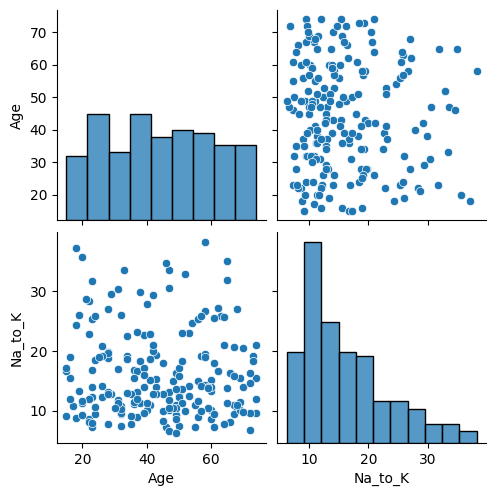

In [13]:
sns.pairplot(df)
plt.show()

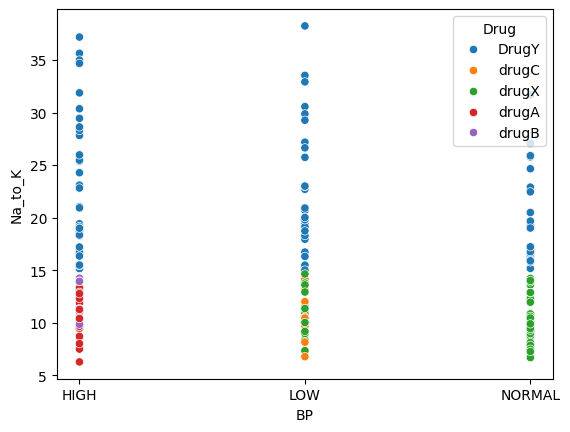

In [29]:
sns.scatterplot(x=df["BP"], y=df["Na_to_K"], hue=df["Drug"])
plt.show()

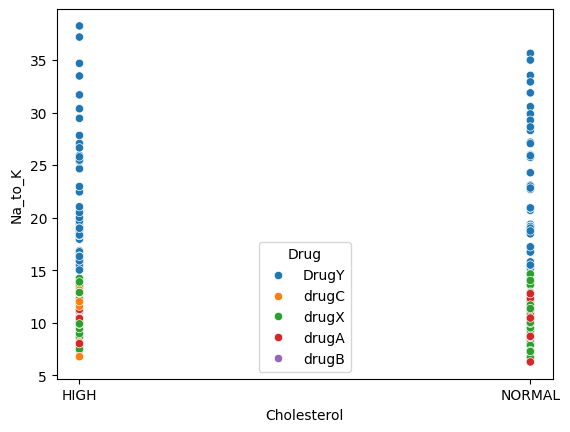

In [31]:
sns.scatterplot(x=df["Cholesterol"], y=df["Na_to_K"], hue=df["Drug"])
plt.show()

In [17]:
df = df.drop("Age", axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()
df["Drug"] = label_encoder.fit_transform(df["Drug"])

In [34]:
X = df.drop("Drug", axis=1)
y = df["Drug"]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
categorical_features = ['Sex', 'BP', 'Cholesterol']
numerical_features = ['Na_to_K']

# Create a column transformer to apply one-hot encoding to categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Apply the preprocessor to the training and test data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [40]:
y_pred=regression.predict(X_test_scaled)
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  1.4464325706054388
mae:  0.9988944024129276
rmse:  1.2026772512213901


In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 score: ", score)
#adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r2 score:  0.5257598129162495
0.4836051296199161


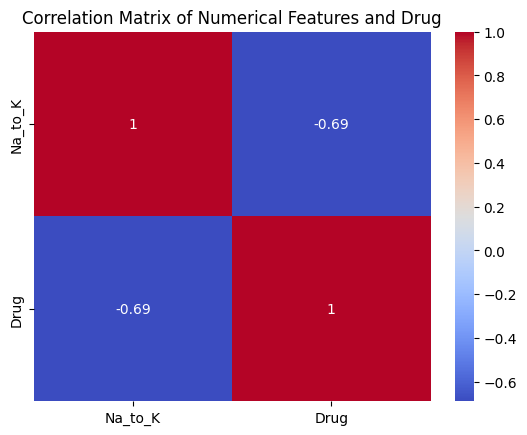

In [43]:
# Drop non-numerical columns before calculating correlation
numerical_df = df.drop(['Sex', 'BP', 'Cholesterol'], axis=1)

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features and Drug')
plt.show()